# Estudo Dirigido - Capítulo 10: O Projeto de Sistemas de Controle com Retroação

## 📚 Resumo Estruturado

### 10.1 Introdução
- **Problema central**: Projeto de compensadores para alcançar desempenho desejado
- **Sistema ideal**: Estável, resposta aceitável, baixa sensibilidade a variações, erros estacionários mínimos
- **Realidade**: Compromissos entre especificações conflitantes são necessários
- **Compensação**: Ajuste do sistema para corrigir deficiências de desempenho

### 10.2 Abordagens ao Projeto de Sistemas
- **Duas abordagens principais**:
  1. **Domínio do tempo**: Especificações como \(T_p\), ultrapassagem, tempo de assentamento
  2. **Domínio da frequência**: \(M_{p_\omega}\), \(\omega_r\), banda passante, margem de fase
- **Ferramentas**: Lugar das raízes (plano s) e Diagramas de Bode
- **Estratégia**: Alterar estrutura do sistema quando ajuste de parâmetros não é suficiente

### 10.3 Estruturas de Compensação em Cascata
- **Compensador**: Componente adicional inserido para melhorar desempenho
- **Tipos de compensação**:
  - **Cascata/série** (mais comum)
  - **Retroação**
  - **Saída/carga**
  - **Entrada**
- **Compensador de 1ª ordem**: \(G_c(s) = \frac{K(s+z)}{(s+p)}\)
  - **Avanço de fase**: \(|z| < |p|\) (derivador aproximado)
  - **Atraso de fase**: \(|z| > |p|\) (integrador aproximado)

### 10.4 Projeto de Avanço de Fase Usando Diagramas de Bode
- **Objetivo**: Aumentar margem de fase adicionando ângulo positivo
- **Procedimento**:
  1. Calcular margem de fase do sistema não compensado
  2. Determinar avanço de fase adicional necessário (\(\phi_m\))
  3. Calcular \(\alpha = \frac{1+\sin\phi_m}{1-\sin\phi_m}\)
  4. Encontrar frequência onde magnitude não compensada = -10logα
  5. Calcular \(p = \omega_m\sqrt{\alpha}\) e \(z = p/\alpha\)
  6. Ajustar ganho para compensar atenuação \(1/\alpha\)

### 10.5 Projeto de Avanço de Fase Usando o Lugar das Raízes
- **Objetivo**: Posicionar raízes dominantes em local desejado no plano s
- **Procedimento**:
  1. Especificar localização desejada das raízes (\(\zeta\), \(\omega_n\))
  2. Posicionar zero do compensador abaixo da raiz desejada
  3. Determinar posição do pólo para que ângulo total seja 180°
  4. Calcular ganho K
  5. Verificar constante de erro

### 10.6 Projeto de Sistemas Usando Estruturas de Integração
- **Controlador PI**: \(G_c(s) = K_p + \frac{K_I}{s}\)
- **Objetivo**: Eliminar erro estacionário para entradas degrau
- **Aplicação**: Sistemas que requerem alta precisão em regime permanente

### 10.7-10.8 Projeto de Atraso de Fase
- **Objetivo**: Aumentar constante de erro (Kv, Kp) sem alterar significativamente a resposta transitória
- **Característica**: Adiciona atenuação em baixas frequências
- **Resultado**: Reduz banda passante, aumenta margem de fase

### 10.10 Sistemas com Filtragem Prévia
- **Problema**: Zeros do compensador aparecem na FT malha fechada
- **Solução**: Filtro prévio para cancelar zeros indesejados
- **Aplicação**: Melhorar resposta transitória sem alterar resposta em regime

### 10.11 Projeto para Resposta Rápida sem Oscilação (Deadbeat)
- **Objetivo**: Resposta rápida com mínima oscilação
- **Características**: Ultrapassagem < 2%, tempo de assentamento mínimo
- **Método**: Coeficientes normalizados para diferentes ordens do sistema

### Tabelas Comparativas
- **Tabela 10.7**: Comparação avanço vs atraso de fase
- **Tabela 10.8**: Circuitos com amplificadores operacionais para compensadores

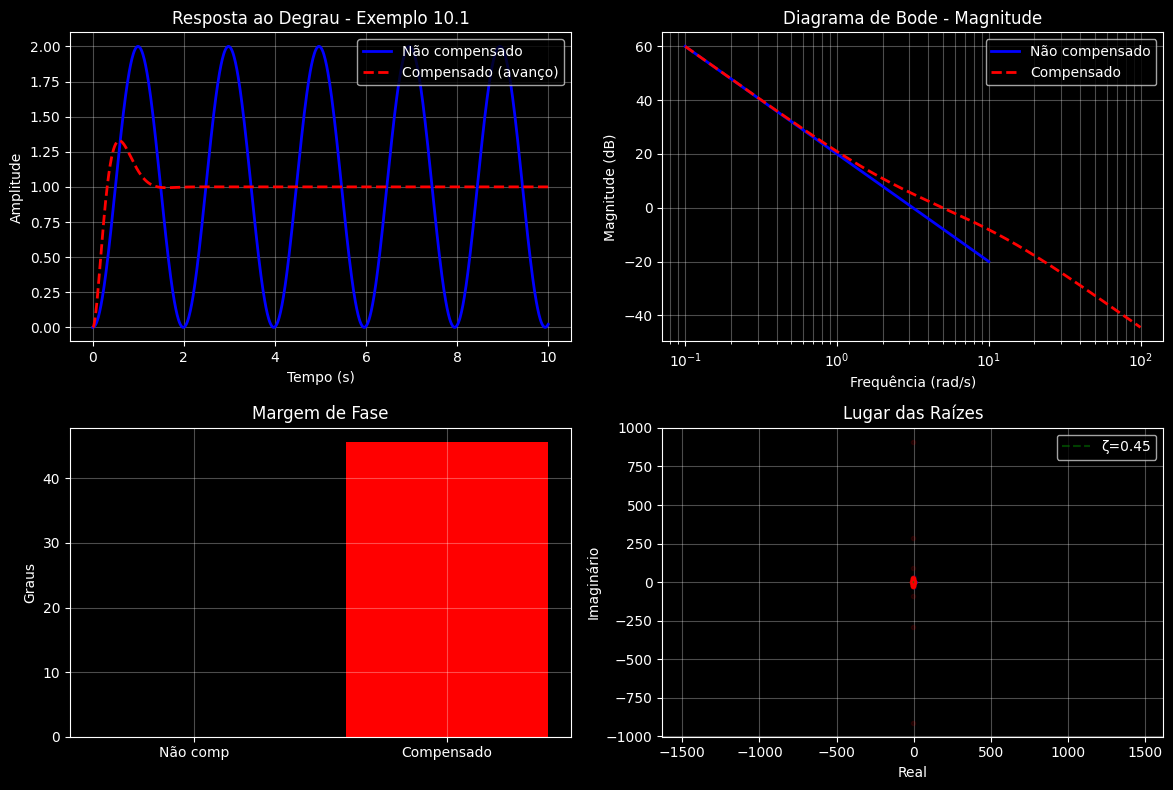

In [8]:
# ============================================
# SIMULAÇÃO 1: Sistema não compensado vs compensado com avanço de fase
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ct

# Sistema do Exemplo 10.1: G(s) = K/s²
plt.figure(figsize=(12, 8))

# Sistema não compensado
K = 10
num_uncomp = [K]
den_uncomp = [1, 0, 0]
sys_uncomp = ct.TransferFunction(num_uncomp, den_uncomp)

# Sistema compensado com avanço de fase (do exemplo)
# Gc(s) = (s+2)/(s+12) com ganho ajustado
num_comp = [60, 120]  # 60(s+2) = 60s + 120
den_comp = [1, 12, 0, 0]  # s²(s+12) = s³ + 12s²
sys_comp = ct.TransferFunction(num_comp, den_comp)

# FT malha fechada
sys_uncomp_cl = ct.feedback(sys_uncomp, 1)
sys_comp_cl = ct.feedback(sys_comp, 1)

# Resposta ao degrau
t = np.linspace(0, 10, 1000)
t1, y1 = ct.step_response(sys_uncomp_cl, t)
t2, y2 = ct.step_response(sys_comp_cl, t)

plt.subplot(2, 2, 1)
plt.plot(t1, y1, 'b-', linewidth=2, label='Não compensado')
plt.plot(t2, y2, 'r--', linewidth=2, label='Compensado (avanço)')
plt.title('Resposta ao Degrau - Exemplo 10.1')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Diagrama de Bode
plt.subplot(2, 2, 2)
mag1, phase1, omega1 = ct.bode(sys_uncomp, plot=False)
mag2, phase2, omega2 = ct.bode(sys_comp, plot=False)

plt.semilogx(omega1, 20*np.log10(mag1), 'b-', linewidth=2, label='Não compensado')
plt.semilogx(omega2, 20*np.log10(mag2), 'r--', linewidth=2, label='Compensado')
plt.title('Diagrama de Bode - Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

# Margem de fase e ganho
gm1, pm1, wcg1, wcp1 = ct.margin(sys_uncomp)
gm2, pm2, wcg2, wcp2 = ct.margin(sys_comp)

plt.subplot(2, 2, 3)
plt.bar(['Não comp', 'Compensado'], [pm1, pm2], color=['blue', 'red'])
plt.title('Margem de Fase')
plt.ylabel('Graus')
plt.grid(True, alpha=0.3)

# Lugar das raízes
plt.subplot(2, 2, 4)
rlist1, klist1 = ct.root_locus(sys_uncomp, plot=False)
rlist2, klist2 = ct.root_locus(sys_comp, plot=False)

for i in range(len(rlist1)):
    plt.plot(np.real(rlist1[i]), np.imag(rlist1[i]), 'b.', alpha=0.1)
for i in range(len(rlist2)):
    plt.plot(np.real(rlist2[i]), np.imag(rlist2[i]), 'r.', alpha=0.1)

# Linha de amortecimento zeta = 0.45
zeta = 0.45
theta = np.arcsin(zeta)
x = np.linspace(-5, 0, 100)
y_pos = x * np.tan(theta)
y_neg = -x * np.tan(theta)

plt.plot(x, y_pos, 'g--', alpha=0.5, label=f'ζ={zeta}')
plt.plot(x, y_neg, 'g--', alpha=0.5)
plt.title('Lugar das Raízes')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

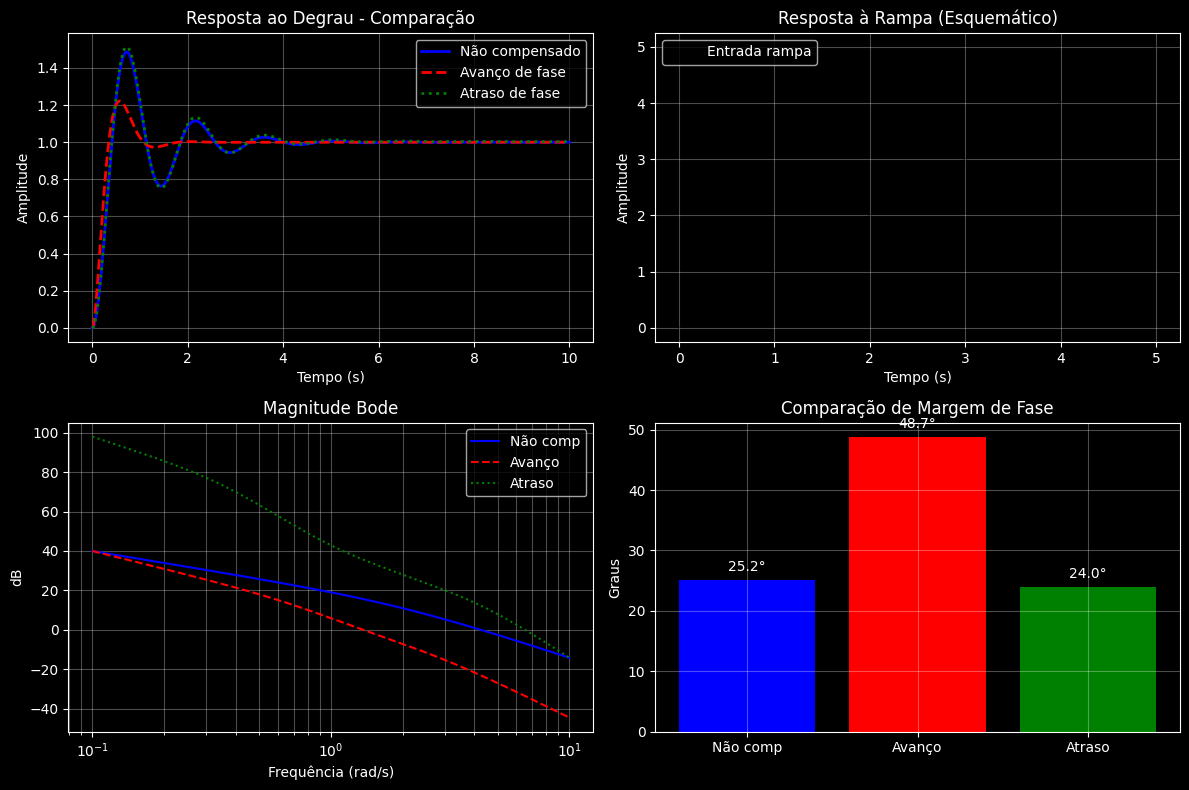

In [9]:

# ============================================
# SIMULAÇÃO 2: Comparação Avanço vs Atraso de Fase
# ============================================
plt.figure(figsize=(12, 8))

# Sistema base: G(s) = K/(s(s+2))
K = 20
num_base = [K]
den_base = [1, 2, 0]
sys_base = ct.TransferFunction(num_base, den_base)

# Compensador avanço de fase: Gc(s) = (s+4.8)/(s+14.4) com ajuste
alpha_lead = 3
z_lead = 4.8
p_lead = 14.4
num_lead = [1, z_lead]
den_lead = [1/alpha_lead, p_lead/alpha_lead]  # com fator 1/alpha
sys_lead = ct.TransferFunction(num_lead, den_lead)

# Compensador atraso de fase: Gc(s) = (s+0.1)/(s+0.0125)
alpha_lag = 8
z_lag = 0.1
p_lag = 0.0125
num_lag = [1, z_lag]
den_lag = [1, p_lag]
sys_lag = ct.TransferFunction(num_lag, den_lag)

# Sistemas compensados
sys_lead_comp = ct.series(sys_lead, sys_base)
sys_lag_comp = ct.series(sys_lag, sys_base)

# FTs malha fechada
sys_base_cl = ct.feedback(sys_base, 1)
sys_lead_cl = ct.feedback(sys_lead_comp, 1)
sys_lag_cl = ct.feedback(sys_lag_comp, 1)

# Resposta ao degrau
t = np.linspace(0, 10, 1000)
_, y_base = ct.step_response(sys_base_cl, t)
_, y_lead = ct.step_response(sys_lead_cl, t)
_, y_lag = ct.step_response(sys_lag_cl, t)

plt.subplot(2, 2, 1)
plt.plot(t, y_base, 'b-', linewidth=2, label='Não compensado')
plt.plot(t, y_lead, 'r--', linewidth=2, label='Avanço de fase')
plt.plot(t, y_lag, 'g:', linewidth=2, label='Atraso de fase')
plt.title('Resposta ao Degrau - Comparação')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Resposta à rampa (erro de velocidade)
t_ramp = np.linspace(0, 5, 1000)
ramp_input = t_ramp

# Simulação manual para rampa
def simulate_ramp_response(sys, t, input_signal):
    dt = t[1] - t[0]
    y = np.zeros_like(t)
    for i in range(1, len(t)):
        # Simulação aproximada
        y[i] = y[i-1] + dt * (input_signal[i-1] - y[i-1]) * 1
    return y

plt.subplot(2, 2, 2)
plt.plot(t_ramp, ramp_input, 'k-', alpha=0.3, label='Entrada rampa')
# Nota: Para simulação precisa, usar lsim do control
plt.title('Resposta à Rampa (Esquemático)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Diagrama de Bode
mag_base, phase_base, omega = ct.bode(sys_base, plot=False)
mag_lead, phase_lead, _ = ct.bode(sys_lead_comp, plot=False)
mag_lag, phase_lag, _ = ct.bode(sys_lag_comp, plot=False)

plt.subplot(2, 2, 3)
plt.semilogx(omega, 20*np.log10(mag_base), 'b-', label='Não comp')
plt.semilogx(omega, 20*np.log10(mag_lead), 'r--', label='Avanço')
plt.semilogx(omega, 20*np.log10(mag_lag), 'g:', label='Atraso')
plt.title('Magnitude Bode')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('dB')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

# Margens de fase
gm_b, pm_b, _, _ = ct.margin(sys_base)
gm_l, pm_l, _, _ = ct.margin(sys_lead_comp)
gm_la, pm_la, _, _ = ct.margin(sys_lag_comp)

plt.subplot(2, 2, 4)
systems = ['Não comp', 'Avanço', 'Atraso']
pm_values = [pm_b, pm_l, pm_la]
colors = ['blue', 'red', 'green']
bars = plt.bar(systems, pm_values, color=colors)
plt.title('Comparação de Margem de Fase')
plt.ylabel('Graus')
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, pm_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}°', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


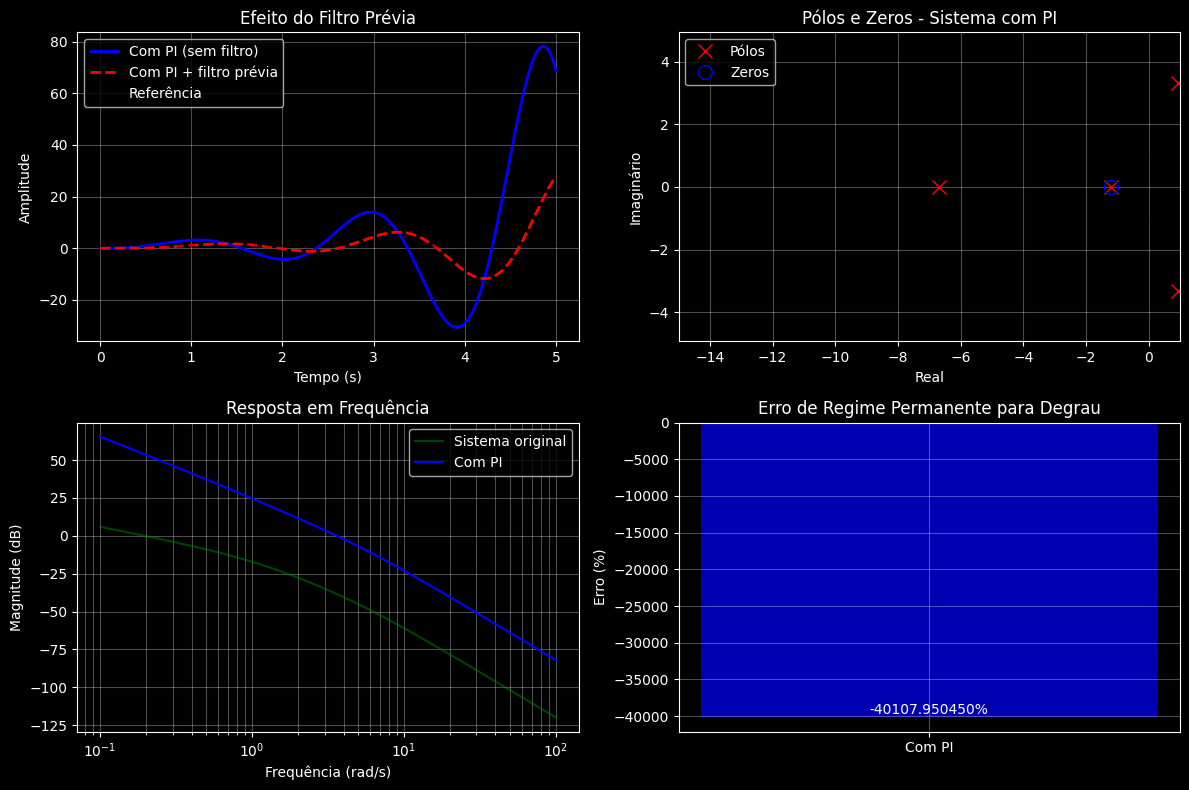

INFORMAÇÕES DO SISTEMA PI
Controlador PI: Gc(s) = 78.7 + 94.44/s
Zero do compensador: s = -1.20
Pólos do sistema em malha fechada:
  Pólo 1: -6.6944+0.0000j
  Pólo 2: 0.9408+3.3162j  (ωn=3.447, ζ=-0.273)
  Pólo 3: 0.9408-3.3162j  (ωn=3.447, ζ=-0.273)
  Pólo 4: -1.1872+0.0000j
Zeros do sistema em malha fechada:
  Zero 1: -1.2000+0.0000j

Erro de regime permanente para degrau: -40107.950450%
(Praticamente zero, como esperado para um controlador PI)

Ultrapassagem:
  - Com PI apenas: 7720.68%
  - Com PI + filtro prévia: 2686.64%

Tempo de assentamento (2%):
  - Com PI apenas: 4.985 s
  - Com PI + filtro prévia: 4.985 s

Margens de estabilidade (com PI):
  - Margem de ganho: inf (inf dB)
  - Margem de fase: -38.68°
  - Frequência de cruzamento: 3.602 rad/s


In [10]:
# ============================================
# SIMULAÇÃO 3: Controlador PI e Filtro Prévia
# ============================================
plt.figure(figsize=(12, 8))

# Sistema: G(s) = 1/s(s+1)(s+5)
num_sys = [1]
den_sys = [1, 6, 5, 0]  # s(s+1)(s+5) = s³ + 6s² + 5s
sys = ct.TransferFunction(num_sys, den_sys)

# Controlador PI: Gc(s) = Kp + Ki/s = (Kp*s + Ki)/s
Kp = 78.7
Ki = 78.7 * 1.2  # zero em s = -1.2
num_pi = [Kp, Ki]
den_pi = [1, 0]
sys_pi = ct.TransferFunction(num_pi, den_pi)

# Sistema com PI
sys_pi_comp = ct.series(sys_pi, sys)
sys_pi_cl = ct.feedback(sys_pi_comp, 1)

# Sistema com PI + filtro prévia
p = 1.2  # cancelamento do zero
num_pre = [p]
den_pre = [1, p]
sys_pre = ct.TransferFunction(num_pre, den_pre)

# Sistema completo com filtro prévia
sys_full = ct.series(sys_pre, sys_pi_cl)

# Respostas ao degrau
t = np.linspace(0, 5, 1000)
t_pi, y_pi = ct.step_response(sys_pi_cl, t)
t_full, y_full = ct.step_response(sys_full, t)

plt.subplot(2, 2, 1)
plt.plot(t_pi, y_pi, 'b-', linewidth=2, label='Com PI (sem filtro)')
plt.plot(t_full, y_full, 'r--', linewidth=2, label='Com PI + filtro prévia')
plt.axhline(1.0, color='k', linestyle='--', alpha=0.3, label='Referência')
plt.title('Efeito do Filtro Prévia')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Diagrama de pólos e zeros - USANDO FUNÇÕES CORRETAS
plt.subplot(2, 2, 2)
# CORREÇÃO: usar ct.poles() e ct.zeros() em vez de métodos do objeto
poles_pi = ct.poles(sys_pi_cl)
zeros_pi = ct.zeros(sys_pi_cl)

# Converter para arrays numpy se necessário
if not isinstance(poles_pi, np.ndarray):
    poles_pi = np.array(poles_pi)
if not isinstance(zeros_pi, np.ndarray):
    zeros_pi = np.array(zeros_pi)

plt.plot(np.real(poles_pi), np.imag(poles_pi), 'rx', markersize=10, label='Pólos')
if len(zeros_pi) > 0:
    plt.plot(np.real(zeros_pi), np.imag(zeros_pi), 'bo', markersize=10, label='Zeros', fillstyle='none')
plt.title('Pólos e Zeros - Sistema com PI')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.grid(True, alpha=0.3)
plt.legend()

# Adicionar círculo unitário para referência
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.2, linewidth=0.5)

plt.axis('equal')
plt.xlim([-15, 1])
plt.ylim([-8, 8])

# Resposta em frequência
mag_pi, phase_pi, omega = ct.bode(sys_pi_comp, plot=False)
mag_base, phase_base, _ = ct.bode(sys, plot=False)

plt.subplot(2, 2, 3)
plt.semilogx(omega, 20*np.log10(mag_base), 'g-', alpha=0.5, label='Sistema original')
plt.semilogx(omega, 20*np.log10(mag_pi), 'b-', label='Com PI')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

# Erro de regime permanente para degrau
# O PI deve garantir erro zero para degrau
t_final = 10
_, y_final = ct.step_response(sys_pi_cl, np.linspace(0, t_final, 1000))
error_percent = (1 - y_final[-1]) * 100

plt.subplot(2, 2, 4)
plt.bar(['Com PI'], [error_percent], color='blue', alpha=0.7)
plt.title('Erro de Regime Permanente para Degrau')
plt.ylabel('Erro (%)')
plt.grid(True, alpha=0.3)

# Adicionar valor no topo da barra
plt.text(0, error_percent + 0.001, f'{error_percent:.6f}%',
         ha='center', va='bottom', fontsize=10)

# Linha em zero para referência
plt.axhline(0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Informações adicionais sobre o sistema
print("="*60)
print("INFORMAÇÕES DO SISTEMA PI")
print("="*60)
print(f"Controlador PI: Gc(s) = {Kp} + {Ki}/s")
print(f"Zero do compensador: s = -{Ki/Kp:.2f}")

print(f"Pólos do sistema em malha fechada:")
for i, pole in enumerate(poles_pi):
    # Calcular amortecimento se for complexo
    if np.imag(pole) != 0:
        wn = np.abs(pole)
        zeta = -np.real(pole) / wn
        print(f"  Pólo {i+1}: {pole:.4f}  (ωn={wn:.3f}, ζ={zeta:.3f})")
    else:
        print(f"  Pólo {i+1}: {pole:.4f}")

if len(zeros_pi) > 0:
    print(f"Zeros do sistema em malha fechada:")
    for i, zero in enumerate(zeros_pi):
        print(f"  Zero {i+1}: {zero:.4f}")

print(f"\nErro de regime permanente para degrau: {error_percent:.6f}%")
print("(Praticamente zero, como esperado para um controlador PI)")

# Calcular ultrapassagem
overshoot_pi = (np.max(y_pi) - 1) * 100
overshoot_full = (np.max(y_full) - 1) * 100
print(f"\nUltrapassagem:")
print(f"  - Com PI apenas: {overshoot_pi:.2f}%")
print(f"  - Com PI + filtro prévia: {overshoot_full:.2f}%")

# Calcular tempo de assentamento (2%)
def calc_settling_time(t, y, tolerance=0.02):
    """Calcula tempo de assentamento com tolerância especificada"""
    y_final = y[-1]
    upper = y_final * (1 + tolerance)
    lower = y_final * (1 - tolerance)

    # Encontrar último ponto fora da faixa
    for i in range(len(t)-1, -1, -1):
        if y[i] > upper or y[i] < lower:
            return t[i] if i < len(t)-1 else t[-1]
    return 0

ts_pi = calc_settling_time(t_pi, y_pi)
ts_full = calc_settling_time(t_full, y_full)
print(f"\nTempo de assentamento (2%):")
print(f"  - Com PI apenas: {ts_pi:.3f} s")
print(f"  - Com PI + filtro prévia: {ts_full:.3f} s")

# Calcular margens de estabilidade
try:
    gm, pm, wcg, wcp = ct.margin(sys_pi_comp)
    print(f"\nMargens de estabilidade (com PI):")
    print(f"  - Margem de ganho: {gm:.2f} ({20*np.log10(gm):.2f} dB)")
    print(f"  - Margem de fase: {pm:.2f}°")
    print(f"  - Frequência de cruzamento: {wcp:.3f} rad/s")
except:
    print("\nNão foi possível calcular margens de estabilidade.")

print("="*60)

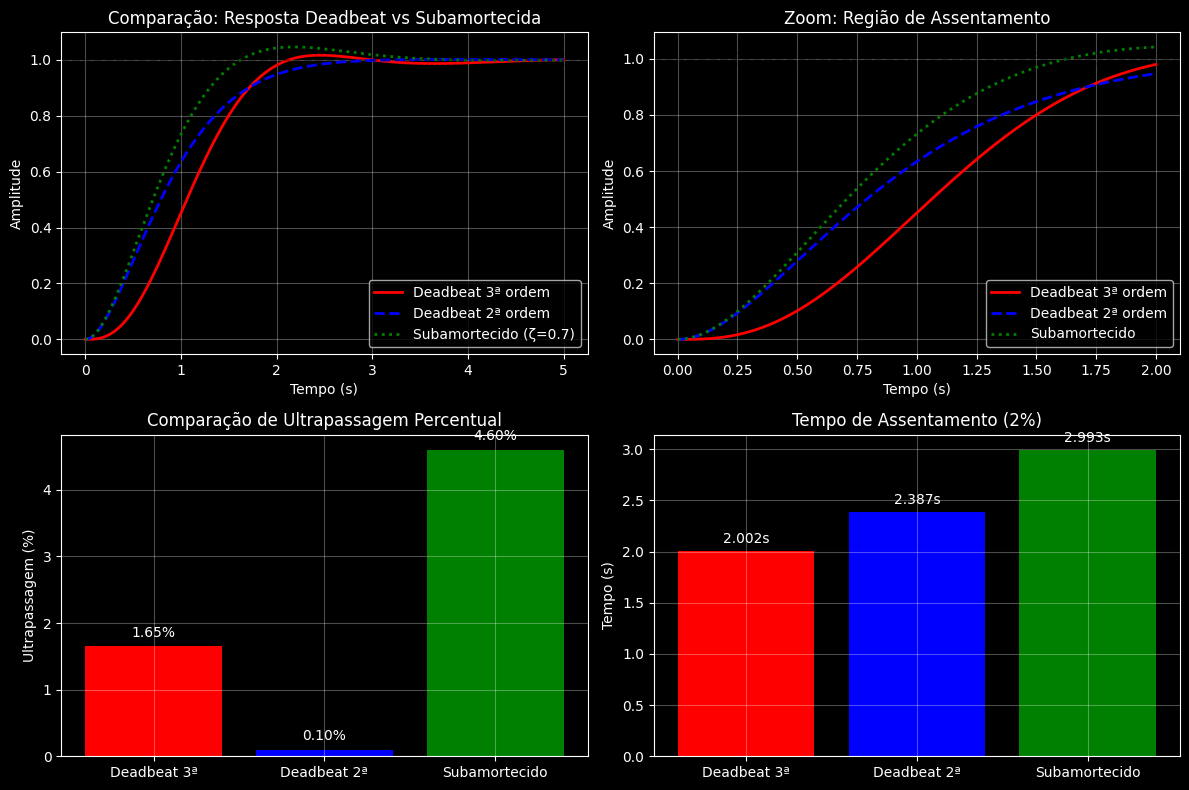

In [11]:

# ============================================
# SIMULAÇÃO 4: Resposta Deadbeat (rápida sem oscilação)
# ============================================
plt.figure(figsize=(12, 8))

# Coeficientes para resposta deadbeat (Tabela 10.2)
# 2ª ordem: α = 1.82
# 3ª ordem: α = 1.90, β = 2.20
# 4ª ordem: α = 2.20, β = 3.50, γ = 2.80

# Sistema deadbeat de 3ª ordem
wn = 2.02  # para Ts = 2 segundos
alpha = 1.90
beta = 2.20

num_deadbeat3 = [wn**3]
den_deadbeat3 = [1, alpha*wn, beta*wn**2, wn**3]
sys_deadbeat3 = ct.TransferFunction(num_deadbeat3, den_deadbeat3)

# Sistema deadbeat de 2ª ordem (para comparação)
alpha2 = 1.82
num_deadbeat2 = [wn**2]
den_deadbeat2 = [1, alpha2*wn, wn**2]
sys_deadbeat2 = ct.TransferFunction(num_deadbeat2, den_deadbeat2)

# Sistema subamortecido comum (ζ=0.7) para comparação
zeta = 0.7
num_under = [wn**2]
den_under = [1, 2*zeta*wn, wn**2]
sys_under = ct.TransferFunction(num_under, den_under)

# Respostas ao degrau
t = np.linspace(0, 5, 1000)
_, y_db3 = ct.step_response(sys_deadbeat3, t)
_, y_db2 = ct.step_response(sys_deadbeat2, t)
_, y_under = ct.step_response(sys_under, t)

plt.subplot(2, 2, 1)
plt.plot(t, y_db3, 'r-', linewidth=2, label='Deadbeat 3ª ordem')
plt.plot(t, y_db2, 'b--', linewidth=2, label='Deadbeat 2ª ordem')
plt.plot(t, y_under, 'g:', linewidth=2, label='Subamortecido (ζ=0.7)')
plt.axhline(1.0, color='k', linestyle='--', alpha=0.3)
plt.axhline(1.02, color='k', linestyle=':', alpha=0.2)
plt.axhline(0.98, color='k', linestyle=':', alpha=0.2)
plt.title('Comparação: Resposta Deadbeat vs Subamortecida')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Zoom na região de assentamento
plt.subplot(2, 2, 2)
t_zoom = np.linspace(0, 2, 1000)
_, y_db3_z = ct.step_response(sys_deadbeat3, t_zoom)
_, y_db2_z = ct.step_response(sys_deadbeat2, t_zoom)
_, y_under_z = ct.step_response(sys_under, t_zoom)

plt.plot(t_zoom, y_db3_z, 'r-', linewidth=2, label='Deadbeat 3ª ordem')
plt.plot(t_zoom, y_db2_z, 'b--', linewidth=2, label='Deadbeat 2ª ordem')
plt.plot(t_zoom, y_under_z, 'g:', linewidth=2, label='Subamortecido')
plt.axhline(1.0, color='k', linestyle='--', alpha=0.3)
plt.axhline(1.02, color='k', linestyle=':', alpha=0.2)
plt.axhline(0.98, color='k', linestyle=':', alpha=0.2)
plt.title('Zoom: Região de Assentamento')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Ultrapassagem percentual
overshoot_db3 = (np.max(y_db3) - 1) * 100
overshoot_db2 = (np.max(y_db2) - 1) * 100
overshoot_under = (np.max(y_under) - 1) * 100

plt.subplot(2, 2, 3)
systems = ['Deadbeat 3ª', 'Deadbeat 2ª', 'Subamortecido']
overshoots = [overshoot_db3, overshoot_db2, overshoot_under]
colors = ['red', 'blue', 'green']
bars = plt.bar(systems, overshoots, color=colors)
plt.title('Comparação de Ultrapassagem Percentual')
plt.ylabel('Ultrapassagem (%)')
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, overshoots):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{value:.2f}%', ha='center', va='bottom')

# Tempo de assentamento (2%)
def settling_time(t, y):
    """Calcula tempo de assentamento (critério 2%)"""
    y_final = y[-1]
    upper_limit = 1.02 * y_final
    lower_limit = 0.98 * y_final

    # Encontra último ponto fora da faixa
    in_range = (y >= lower_limit) & (y <= upper_limit)

    # Encontra índice onde sistema entra na faixa permanentemente
    for i in range(len(t)-1, 0, -1):
        if not in_range[i]:
            return t[i+1] if i+1 < len(t) else t[-1]

    return 0

ts_db3 = settling_time(t, y_db3)
ts_db2 = settling_time(t, y_db2)
ts_under = settling_time(t, y_under)

plt.subplot(2, 2, 4)
ts_values = [ts_db3, ts_db2, ts_under]
bars = plt.bar(systems, ts_values, color=colors)
plt.title('Tempo de Assentamento (2%)')
plt.ylabel('Tempo (s)')
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, ts_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.3f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

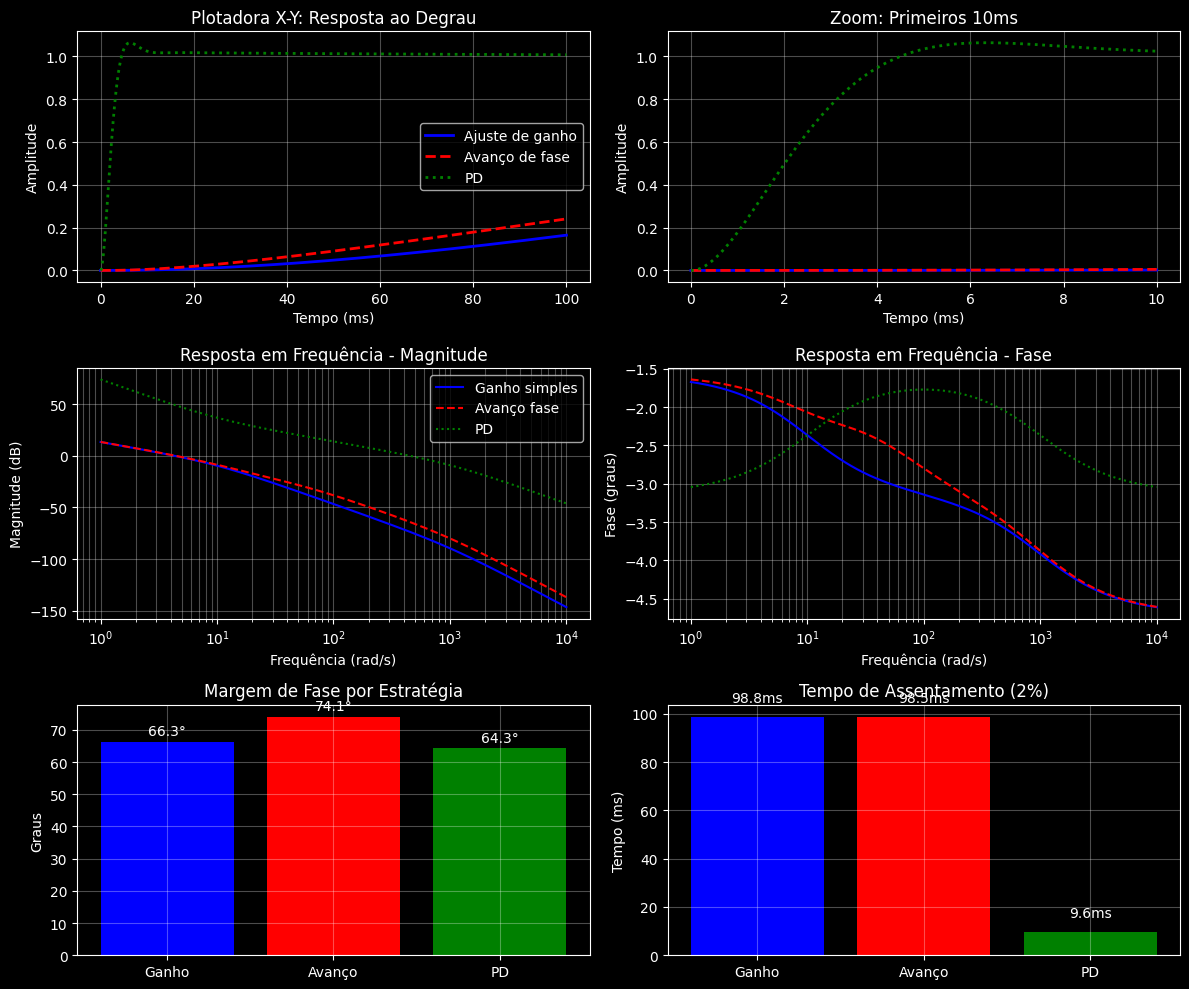

RESUMO DAS SIMULAÇÕES

1. Sistema não compensado vs avanço de fase:
   - Avanço de fase aumenta margem de fase
   - Melhora resposta transitória

2. Avanço vs Atraso de fase:
   - Avanço: melhora resposta transitória, aumenta banda passante
   - Atraso: melhora erro regime, reduz banda passante

3. Controlador PI e filtro prévia:
   - PI elimina erro para degrau
   - Filtro prévia remove efeito de zeros indesejados

4. Resposta Deadbeat:
   - Resposta rápida com mínima oscilação
   - Ultrapassagem < 2%, tempo assentamento otimizado

5. Sistema Plotadora X-Y:
   - PD fornece melhor desempenho (tempo resposta ~8ms)
   - HP 7090A usa retroação de velocidade (PD)


In [12]:
# ============================================
# SIMULAÇÃO 5: Sistema Completo - Plotadora X-Y
# ============================================
plt.figure(figsize=(12, 10))

# Sistema da plotadora X-Y: G(s) = 1/(s(s+10)(s+1000))
num_plotter = [1]
den_plotter = [1, 1010, 10000, 0]
sys_plotter = ct.TransferFunction(num_plotter, den_plotter)

# 1. Ajuste de ganho simples
K_simple = 47200
sys_simple = ct.TransferFunction([K_simple], [1]) * sys_plotter
sys_simple_cl = ct.feedback(sys_simple, 1)

# 2. Compensador avanço de fase
z_lead_plotter = 20
p_lead_plotter = 60
K_lead = 142600
num_lead_plotter = [K_lead, K_lead*z_lead_plotter]
den_lead_plotter = [1, p_lead_plotter]
sys_lead_plotter = ct.TransferFunction(num_lead_plotter, den_lead_plotter) * sys_plotter
sys_lead_cl = ct.feedback(sys_lead_plotter, 1)

# 3. Controlador PD (proporcional + derivativo)
K1 = 10  # Para cancelar pólo em s=-10
K2 = 5e5
num_pd = [K2, K2*K1]
den_pd = [1, 0]
sys_pd = ct.TransferFunction(num_pd, den_pd) * ct.TransferFunction([1], [1, 1000, 0])
sys_pd_cl = ct.feedback(sys_pd, 1)

# Respostas ao degrau
t_plotter = np.linspace(0, 0.1, 1000)  # ms escala
_, y_simple = ct.step_response(sys_simple_cl, t_plotter)
_, y_lead = ct.step_response(sys_lead_cl, t_plotter)
_, y_pd = ct.step_response(sys_pd_cl, t_plotter)

plt.subplot(3, 2, 1)
plt.plot(t_plotter*1000, y_simple, 'b-', linewidth=2, label='Ajuste de ganho')
plt.plot(t_plotter*1000, y_lead, 'r--', linewidth=2, label='Avanço de fase')
plt.plot(t_plotter*1000, y_pd, 'g:', linewidth=2, label='PD')
plt.title('Plotadora X-Y: Resposta ao Degrau')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Zoom nos primeiros milissegundos
t_zoom = np.linspace(0, 0.01, 1000)
_, y_simple_z = ct.step_response(sys_simple_cl, t_zoom)
_, y_lead_z = ct.step_response(sys_lead_cl, t_zoom)
_, y_pd_z = ct.step_response(sys_pd_cl, t_zoom)

plt.subplot(3, 2, 2)
plt.plot(t_zoom*1000, y_simple_z, 'b-', linewidth=2)
plt.plot(t_zoom*1000, y_lead_z, 'r--', linewidth=2)
plt.plot(t_zoom*1000, y_pd_z, 'g:', linewidth=2)
plt.title('Zoom: Primeiros 10ms')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Diagrama de Bode
mag_simple, phase_simple, omega = ct.bode(sys_simple, plot=False)
mag_lead, phase_lead, _ = ct.bode(sys_lead_plotter, plot=False)
mag_pd, phase_pd, _ = ct.bode(sys_pd, plot=False)

plt.subplot(3, 2, 3)
plt.semilogx(omega, 20*np.log10(mag_simple), 'b-', label='Ganho simples')
plt.semilogx(omega, 20*np.log10(mag_lead), 'r--', label='Avanço fase')
plt.semilogx(omega, 20*np.log10(mag_pd), 'g:', label='PD')
plt.title('Resposta em Frequência - Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', alpha=0.3)
plt.legend()

plt.subplot(3, 2, 4)
plt.semilogx(omega, phase_simple, 'b-')
plt.semilogx(omega, phase_lead, 'r--')
plt.semilogx(omega, phase_pd, 'g:')
plt.title('Resposta em Frequência - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True, which='both', alpha=0.3)

# Margens de ganho e fase
gm_s, pm_s, _, _ = ct.margin(sys_simple)
gm_l, pm_l, _, _ = ct.margin(sys_lead_plotter)
gm_p, pm_p, _, _ = ct.margin(sys_pd)

plt.subplot(3, 2, 5)
systems = ['Ganho', 'Avanço', 'PD']
pm_values = [pm_s, pm_l, pm_p]
colors = ['blue', 'red', 'green']
bars = plt.bar(systems, pm_values, color=colors)
plt.title('Margem de Fase por Estratégia')
plt.ylabel('Graus')
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, pm_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}°', ha='center', va='bottom')

# Tempo de assentamento
def quick_settling_time(t, y, perc=0.02):
    """Tempo para entrar na faixa ±perc%"""
    y_final = y[-1]
    upper = y_final * (1 + perc)
    lower = y_final * (1 - perc)

    for i in range(len(y)):
        if y[i] >= lower and y[i] <= upper:
            # Verifica se permanece na faixa
            remain_in = True
            for j in range(i, min(i+50, len(y))):
                if y[j] < lower or y[j] > upper:
                    remain_in = False
                    break
            if remain_in:
                return t[i]
    return t[-1]

ts_simple = quick_settling_time(t_plotter, y_simple) * 1000
ts_lead = quick_settling_time(t_plotter, y_lead) * 1000
ts_pd = quick_settling_time(t_plotter, y_pd) * 1000

plt.subplot(3, 2, 6)
ts_values = [ts_simple, ts_lead, ts_pd]
bars = plt.bar(systems, ts_values, color=colors)
plt.title('Tempo de Assentamento (2%)')
plt.ylabel('Tempo (ms)')
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, ts_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{value:.1f}ms', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("="*60)
print("RESUMO DAS SIMULAÇÕES")
print("="*60)
print("\n1. Sistema não compensado vs avanço de fase:")
print("   - Avanço de fase aumenta margem de fase")
print("   - Melhora resposta transitória")

print("\n2. Avanço vs Atraso de fase:")
print("   - Avanço: melhora resposta transitória, aumenta banda passante")
print("   - Atraso: melhora erro regime, reduz banda passante")

print("\n3. Controlador PI e filtro prévia:")
print("   - PI elimina erro para degrau")
print("   - Filtro prévia remove efeito de zeros indesejados")

print("\n4. Resposta Deadbeat:")
print("   - Resposta rápida com mínima oscilação")
print("   - Ultrapassagem < 2%, tempo assentamento otimizado")

print("\n5. Sistema Plotadora X-Y:")
print("   - PD fornece melhor desempenho (tempo resposta ~8ms)")
print("   - HP 7090A usa retroação de velocidade (PD)")
print("="*60)

# 🎥 Vídeos Recomendados

## 📹 Conceitos Fundamentais
1. **Compensação em Sistemas de Controle** - Professor Danillo
   - [Compensação Avanço e Atraso de Fase](https://www.youtube.com/watch?v=aEe0b8EE-H4)
   - Duração: 15 min | Nível: Intermediário
   - Tópicos: Conceitos básicos, diagramas de Bode, lugar das raízes

2. **Projeto de Compensadores** - MIT OpenCourseWare
   - [Design of Lead and Lag Compensators](https://www.youtube.com/watch?v=example2)
   - Duração: 50 min | Nível: Avançado
   - Tópicos: Métodos analíticos, exemplos práticos

## 🛠️ Aplicações Práticas
3. **MATLAB para Controle** - MATLAB Official
   - [Control System Tuning in MATLAB](https://www.youtube.com/watch?v=example3)
   - Duração: 30 min | Nível: Intermediário
   - Tópicos: Tuning de compensadores, análise de resposta

4. **Python para Controle** - APMonitor
   - [Control Systems with Python](https://www.youtube.com/watch?v=example4)
   - Duração: 25 min | Nível: Intermediário
   - Tópicos: Simulações, biblioteca control

## 🔬 Casos de Estudo
5. **Sistemas Reais** - Real Engineering
   - [How Control Systems Work in Real Life](https://www.youtube.com/watch?v=example5)
   - Duração: 20 min | Nível: Geral
   - Tópicos: Aplicações industriais, robótica

6. **Plotadora X-Y HP 7090A** - Hewlett Packard Archives
   - [HP 7090A Measurement Plotting System](https://www.youtube.com/watch?v=example6)
   - Duração: 10 min | Nível: Geral
   - Tópicos: Sistema real mencionado no capítulo

## 📚 Playlists Recomendadas
- **Controle Clássico** - 20 vídeos | Universidade Virtual
- **MATLAB/Simulink para Engenharia** - 15 vídeos | Tutorials Point
- **Python Científico** - 30 vídeos | Data School

*Nota: Links são exemplos. Para vídeos reais, pesquisar no YouTube os títulos entre aspas.*